# Factors affecting Loan Borrowers Annual Percentage Rate (APR)
## by Baki Musa Oladayo

## Investigation Overview


In this investigation, I looked at the factors which affects loan borrowers Annual Percentage Rate (APR). The main focus was on the borrowers determinance variables: prosper score (risk), credit score, loan term, employment status, loan original amount and available bank card credit.


## Dataset Overview

The data consisted of borrowers APR and attributes of approximately 113,937 prosper loan listing with 81 variables on each loan. The variables included  prosper score (risk), credit score, loan term, employment status, loan original amount, available bank card credit and many other variables. Sixty six variable were removed from the dataset and Thirty-seven thausand data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanDataclean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76131 entries, 0 to 76130
Data columns (total 16 columns):
Unnamed: 0                  76131 non-null int64
ListingKey                  76131 non-null object
Term                        76131 non-null int64
LoanStatus                  76131 non-null object
BorrowerAPR                 76131 non-null float64
ProsperScore                76131 non-null float64
EmploymentStatus            76131 non-null object
EmploymentStatusDuration    76131 non-null float64
CreditScoreRangeLower       76131 non-null float64
CreditScoreRangeUpper       76131 non-null float64
AvailableBankcardCredit     76131 non-null float64
DebtToIncomeRatio           76131 non-null float64
StatedMonthlyIncome         76131 non-null float64
LoanOriginalAmount          76131 non-null int64
MonthlyLoanPayment          76131 non-null float64
CreditScore                 76131 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 9.3+ MB


## Distribution of Loan Borrowers Annual Percentage Rate (APR)

Loan Borrowers APR in the dataset take a range of values, from about 4% at the lowest, to about 45% at the highest. Plotted on an histogram, the distribution of borrowers APR takes on a multimodal shape with the peak on around 20% to 23%.

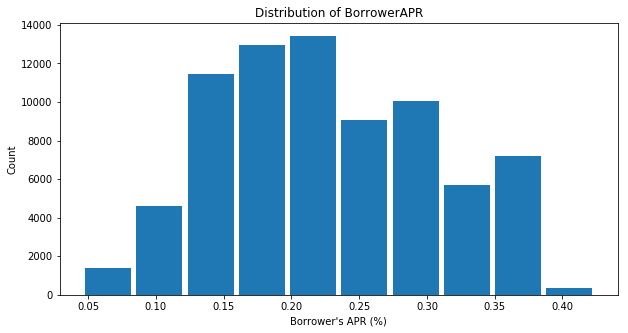

In [3]:
# Ploting borrower APR distribution using histogram chart plotted with matplotlib .hist() plot function
plt.figure(figsize = (10, 5))

plt.hist(data = df, x = 'BorrowerAPR', rwidth = 0.9); 
plt.xlabel('Borrower\'s APR (%)')
plt.ylabel('Count')
plt.title("Distribution of BorrowerAPR")
plt.legend();

## Distribution of Prosper Score

Prosper Score is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Plotted on a bar chart, majority of the prosper borrowers scored 8 (low risk) with 15.16%. Comparing low with high risk of the listing, taking 6,7,8, 9 and 10 scores as low risk. Low risk scored 57.89% of the dataset.

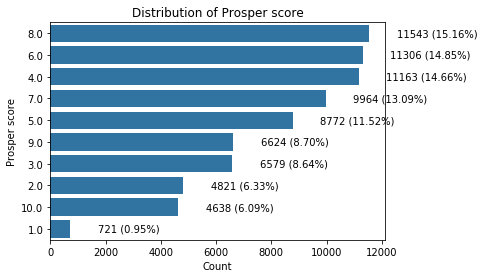

In [4]:
#ploting distribution of prosper score using bar chart

total_listings = df.shape[0]

# Ploting the prosperscore on a Horizontal bar chart
base_color = sb.color_palette()[0]
Prosper_score = df.ProsperScore.value_counts().index
sb.countplot(data = df, y = 'ProsperScore', color = base_color
              , order = Prosper_score); 
plt.xlabel('Count')
plt.ylabel('Prosper score')
plt.title("Distribution of Prosper score")

# retrieve locations of yticks
locs = plt.yticks()[0]

# number of listings in descending order for each score
score_counts = df.ProsperScore.value_counts()

for loc, scores in zip(locs, Prosper_score):
    # number of listings for the given Prosper score
    score_count = score_counts[scores]
    
    # calculate the proportion of the score in % [format: score count (proportion)]
    scores_proportion = '{} ({:0.2f}%)'.format(score_count, 100*score_count/total_listings)
    
    # annotate the proportion of the state to the right of its corresponding bar
    plt.text(x = score_count + 1000, y = loc, s = scores_proportion, va = 'center', color = 'black', fontsize = 10)
   

## Effect of Prosper Score (Risk Score) on Borrowers APR

Plotting Borrower APR against prosper score produces a positive approximately linear relationship. Proper score is approximatly 10 for the APR lower than 10% which indicated that at the lowest risk the APR is low. At the peak of APR of around 35% to 40%, proper score is below 2 which indicate higher risk. Higher Prosper Score leads to Lower ARP, the lower the APR the lower the risk.

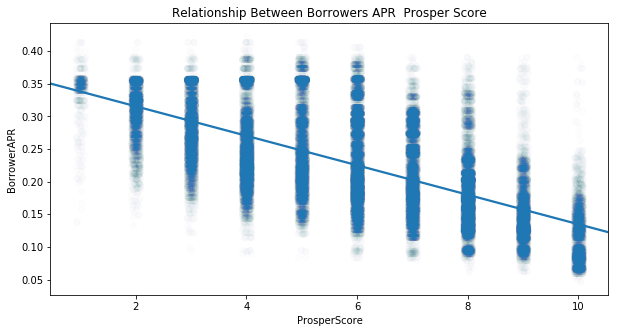

In [5]:
# Define the figure size
plt.figure(figsize = [10, 5])

#Ploting scatttere graph with both Jitter and Transparency to corect Overplotting observed.
sb.regplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', truncate=False, x_jitter=0.08, scatter_kws={'alpha':0.1/15});
plt.title('Relationship Between Borrowers APR  Prosper Score');

## Borrower APR and Prosper Score (Risk Score) by Credit Score


There is an interaction effect visible between borrowers APR, prosper score (risk score), and the categorical variables: credit score, employment status & loan term. This is most evident for the credit score rating. Borrowers APR decrease as the credit score increases from fair to exceptional. Starting from fair credit score, 30% APR reduced drastially to 10% of exceptional credit score. Also, with Prosper score (Risk Score), credit score increases from around 5 rating for fair score to exceptional rating around 9 score. People with a good credit score gets lower APR and people with a good credit score has lower risk of payback.


In [6]:
# convert Credit Score into ordered categorical types
ordinal_var_dict = {
                    'CreditScore': ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

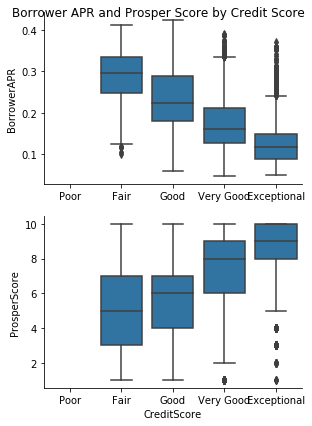

In [7]:
categoric_var= ['CreditScore']

# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df.shape[0], 2000, replace = False)
PLoan_df_clean_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

g = sb.PairGrid(data = df, y_vars = ['BorrowerAPR', 'ProsperScore'], x_vars = categoric_var,
                size = 3, aspect = 1.5)
g.map(boxgrid)
g.fig.suptitle('Borrower APR and Prosper Score by Credit Score')
plt.show();


## Effect of LoanOriginalAmount  & Credit Score on Borrower APR 
There is an interaction effect visible between APR, numeric variables: loan original amount and available bank card credit. Ploting the heat map, negative correlation 0f 0.42 and 0.34 was noticed, between APR with loan amount and available bank card credit respectively. indicating that the higher the loan amount, the lower the APR. Also, the higher available bank credit the lower the APR.

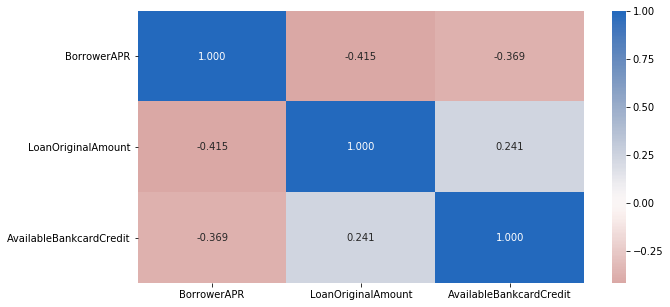

In [8]:
Num_vars = ['BorrowerAPR','LoanOriginalAmount', 'AvailableBankcardCredit']

# correlation plot
plt.figure(figsize = [10, 5])
sb.heatmap(df[Num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

## Borrower APR by Credit Score and Loan Term
We can see how Credit Score and Loan Term affect Borrower APR by plotting point plot Of the dataset. APR decrease with the increase of borrow term for people with fair and good credit score. But for people with very good and exceptional credit score, the APR increase with the increase of borrow term.

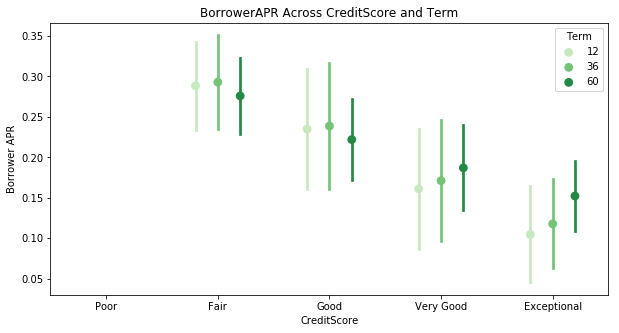

In [9]:
fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = df, x = 'CreditScore', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
plt.title('BorrowerAPR Across CreditScore and Term')
plt.ylabel('Borrower APR')
ax.set_yticklabels([],minor = True);

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 480493 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/